# Econometrics - Analysis on Cross Section Data   -->

# Class - 1

### Dataset --> westbengal.csv

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.iolib import summary2
from statsmodels.api import OLS
from statsmodels.compat import lzip
%matplotlib inline

In [ ]:
df = pd.read_csv('.../westbengal.csv')

df.head()

,hhid,state,district,sector,hhsize,religion,socialgroup,nchild_l15,nold_ge60,male,female,maxedu,price1,totalexp,percapita,share1
0,72285$1$1$02$2$68,West Bengal,1,Rural,4,Hinduism,Scheduled tribes,0,1,3,1,4,4.553044,14128.640,3532.160,0.080333
1,72636$2$1$01$1$68,West Bengal,1,Rural,4,Christianity,Scheduled tribes,2,0,2,2,4,4.553044,13429.080,3357.271,0.105964
2,72285$1$3$02$1$68,West Bengal,1,Rural,3,Hinduism,0,1,0,1,2,4,4.553044,7227.096,2409.032,0.082467
3,72283$2$1$01$2$68,West Bengal,1,Rural,5,Christianity,0,1,0,2,3,5,4.553044,10154.960,2030.993,0.176268
4,72615$1$2$01$2$68,West Bengal,1,Rural,5,Hinduism,0,3,0,4,1,4,4.553044,8873.998,1774.800,0.144242


In [ ]:
df.shape

(9530, 16)

In [ ]:
df.columns

Index(['hhid', 'state', 'district', 'sector', 'hhsize', 'religion',
       'socialgroup', 'nchild_l15', 'nold_ge60', 'male', 'female', 'maxedu',
       'price1', 'totalexp', 'percapita', 'share1'],
      dtype='object')

Text(0.5, 1.0, 'Expenditure Share on Food vs Per Capita Expenditure')

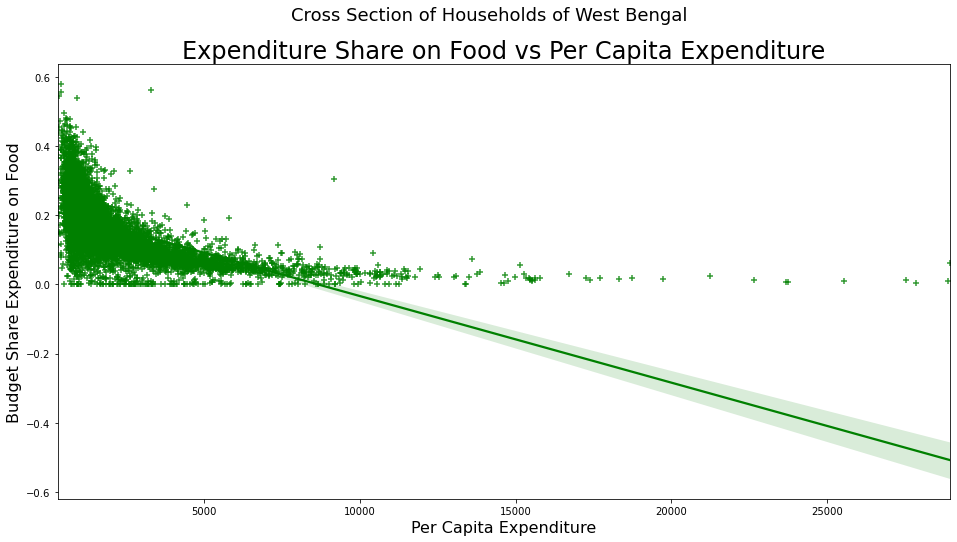

In [ ]:
plt.figure(figsize=(16, 8))
sns.regplot(x='percapita',y='share1',data=df,color='g',scatter=True,fit_reg=True,marker="+")
plt.xlabel("Per Capita Expenditure", size=16)
plt.suptitle("Cross Section of Households of West Bengal", size = 18)
plt.ylabel("Budget Share Expenditure on Food", size=16)
plt.title("Expenditure Share on Food vs Per Capita Expenditure", size=24)

In [ ]:
df1 = df[['percapita','share1']]
df1.corr()

,percapita,share1
percapita,1.000000,-0.593781
share1,-0.593781,1.000000


# Using Pasty Formula

In [ ]:
linm = smf.ols('share1 ~ percapita',df) 
linmr = linm.fit()
print(linmr.summary())

                            OLS Regression Results                            
Dep. Variable:                 share1   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     5189.
Date:                Sun, 06 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:33:22   Log-Likelihood:                 12415.
No. Observations:                9530   AIC:                        -2.483e+04
Df Residuals:                    9528   BIC:                        -2.481e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2170      0.001    218.781      0.0

In [ ]:
yhat = linmr.predict()

In [ ]:
y = df['share1']
res = y - yhat

In [ ]:
res

0      -0.048181
1      -0.026932
2      -0.074187
3       0.010143
4      -0.028303
          ...   
9525   -0.146523
9526   -0.141720
9527   -0.008140
9528   -0.002547
9529   -0.063455
Name: share1, Length: 9530, dtype: float64

In [ ]:
yhat = pd.Series(yhat)
y = pd.DataFrame(y)
yhat = pd.DataFrame(yhat)

pandas.core.frame.DataFrame

In [ ]:
df2 = pd.concat([y,yhat],ignore_index=True)

df2.corr()

,share1,0
share1,1.0,NaN
0,NaN,1.0


In [ ]:
x = df[['percapita']]
df3 = pd.concat([x,yhat],ignore_index=True)
df3.corr()

,percapita,0
percapita,1.0,NaN
0,NaN,1.0


# Class - 2

### Dataset --> crosssection.csv

In [ ]:
df_cs = pd.read_csv('.../crosssection.csv')
df_cs.head()

,state,actualmpce,children,adult,wcereal,selfagri,agriandotherlab,selfemnonag,rnd
0,123,103.12600,3.0,2.0,0.155150,0,0,0,55
1,123,78.50333,1.0,2.0,0.021230,1,0,0,55
2,123,120.29750,2.0,2.0,0.130925,1,0,0,55
3,123,206.19800,0.0,5.0,0.257034,1,0,0,55
4,123,169.05000,0.0,3.0,0.154787,1,0,0,55


In [ ]:
df_cs.shape

(143110, 9)

In [ ]:
df_cs['lx1']=np.log(df_cs[['actualmpce']])

<ipython-input-16-abc408c990c5>:1: RuntimeWarning: divide by zero encountered in log
  df_cs['lx1']=np.log(df_cs[['actualmpce']])


In [ ]:
X = df_cs['lx1']
X

0         4.635952
1         4.363141
2         4.789968
3         5.328837
4         5.130195
            ...   
143105    6.201097
143106    6.799624
143107    6.186147
143108    6.125558
143109    6.174078
Name: lx1, Length: 143110, dtype: float64

In [ ]:
linm_cs = smf.ols('wcereal ~ lx1',df_cs) 
linmr_cs = linm_cs.fit()
print(linmr_cs.summary())

                            OLS Regression Results                            
Dep. Variable:                wcereal   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     2468.
Date:                Sun, 06 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:33:24   Log-Likelihood:                 73682.
No. Observations:              143065   AIC:                        -1.474e+05
Df Residuals:                  143063   BIC:                        -1.473e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4926      0.003    161.118      0.0

In [ ]:
mlinm_cs = smf.ols('wcereal ~ lx1+adult+children',df_cs) 
mlinmr_cs = mlinm_cs.fit()
print(mlinmr_cs.summary())

                            OLS Regression Results                            
Dep. Variable:                wcereal   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     1715.
Date:                Sun, 06 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:33:25   Log-Likelihood:                 68754.
No. Observations:              130082   AIC:                        -1.375e+05
Df Residuals:                  130078   BIC:                        -1.375e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4306      0.004    118.753      0.0

## <span style="color:blue"> || Heteroscedasticity Test --> Breusch Pagan (BP) ||</span>

In [ ]:
name = ['Lagrange multiplier statistic (BP) = ', 'p-value = ',
        'f-value = ', 'f p-value = ']
test = sms.het_breuschpagan(mlinmr_cs.resid, mlinmr_cs.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic (BP) = ', 2975.1248150725346),
 ('p-value = ', 0.0),
 ('f-value = ', 1014.8894650845647),
 ('f p-value = ', 0.0)]

### <span style="color:green"> || BP Test Observation --> Heteroscedasticity is present in the data as 'f p-value = ', 0.0) ||</span>

## <span style="color:blue"> || Heteroscedasticity Test --> White ||</span>

In [ ]:
name = ['Lagrange multiplier statistic (BP) = ', 'p-value = ',
        'f-value = ', 'f p-value = ']
test = sms.het_white(mlinmr_cs.resid, mlinmr_cs.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic (BP) = ', 7932.504364832376),
 ('p-value = ', 0.0),
 ('f-value = ', 938.5554810677918),
 ('f p-value = ', 0.0)]

### <span style="color:green"> || White Test Observation --> Heteroscedasticity is present in the data as 'f p-value = ', 0.0) ||</span>

## <span style="color:blue"> || Calculating Heteroscedasticity --> Consistent Robuast Standard Error (HC1) ||</span>

In [ ]:
mlinmr_cs_robust = mlinmr_cs.get_robustcov_results()
print(mlinmr_cs_robust.summary())

                            OLS Regression Results                            
Dep. Variable:                wcereal   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     1654.
Date:                Sun, 06 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:33:26   Log-Likelihood:                 68754.
No. Observations:              130082   AIC:                        -1.375e+05
Df Residuals:                  130078   BIC:                        -1.375e+05
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4306      0.004     97.616      0.0

### <span style="color:green"> || After Applying HC1 - Observation ||</span>

### Without HC1  -->
![image.png](attachment:c8c0f156-e87e-4ae4-8bb0-f2d777575bdf.png)

### With HC1   -->
![image.png](attachment:3965200e-f389-4ba1-affe-ddfefb559e69.png)